In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

C:\Users\lmh23\AppData\Local\Temp\ipykernel_4128\2496444233.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv('./archive/abcnews-date-text.csv', usecols=["headline_text"], on_bad_lines='skip')
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 1 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   headline_text  1244184 non-null  object
dtypes: object(1)
memory usage: 9.5+ MB


In [5]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text')

,headline_text
116298,10 killed in pakistan bus crash
57967,10 killed in pakistan bus crash
911080,110 with barry nicholls
672958,110 with barry nicholls
748629,110 with barry nicholls
...,...
835746,zoo stoush heads to vcat
855107,zoonotic disease research
966531,zoonotic disease research
644322,zsa zsa back in hospital


In [6]:
data = data.drop_duplicates('headline_text')

In [7]:
# TF-IDF

# punctuation
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', "%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

# Your text data
desc = data['headline_text'].values
vectorizer = TfidfVectorizer(stop_words=list(stop_words))

# Transforming your text data
X = vectorizer.fit_transform(desc)
word_features = vectorizer.get_feature_names_out()

print("The length of the vocabulary is: ", len(word_features))
print(word_features[5000:5100])

The length of the vocabulary is:  105674
['affidavit' 'affidavits' 'affiliate' 'affiliated' 'affiliation'
 'affiliations' 'affinity' 'affirm' 'affirmation' 'affirmative' 'affirmed'
 'affirming' 'affirms' 'affleck' 'afflecks' 'affliate' 'afflicted'
 'affliction' 'afflicts' 'affliliated' 'affllicting' 'affluence'
 'affluent' 'affluenza' 'afforable' 'afford' 'affordabil' 'affordabili'
 'affordability' 'affordabilitys' 'affordable' 'affordablility' 'afforded'
 'affordibility' 'affording' 'affords' 'afforestation' 'affray' 'affront'
 'afgan' 'afganistan' 'afganistans' 'afgc' 'afghan' 'afghani' 'afghanis'
 'afghanistan' 'afghanistans' 'afghanl' 'afghans' 'afghanstans'
 'afhganistan' 'afi' 'afic' 'afican' 'aficionados' 'afield' 'afiomai'
 'afircan' 'afis' 'afkari' 'afl' 'afl2' 'aflame' 'aflca' 'aflgf' 'aflie'
 'afll' 'aflm' 'aflnick' 'aflnt' 'afloat' 'aflpa' 'aflq' 'afls' 'aflutter'
 'aflw' 'aflws' 'aflx' 'afma' 'afmas' 'afoa' 'afoot' 'afp' 'afpa' 'afpla'
 'afps' 'afr' 'afraid' 'afrcia' 'afre

In [8]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [9]:
vectorizer2 = TfidfVectorizer(stop_words = list(stop_words), tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names_out()
print(len(word_features2))
print(word_features2[:50]) 

e:\Anaconda\envs\LMH\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
e:\Anaconda\envs\LMH\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 

73341
["'a" "'i" "'s" "'x" 'aa' 'aaa' 'aaahhh' 'aac' 'aacc' 'aaco' 'aacta' 'aad'
 'aadhaar' 'aadmi' 'aag' 'aagaard' 'aagard' 'aah' 'aalto' 'aam' 'aamer'
 'aami' 'aamodt' 'aandahl' 'aant' 'aap' 'aapa' 'aapt' 'aar' 'aaradhna'
 'aardman' 'aardvark' 'aargau' 'aaron' 'aaronpaul' 'aarwun' 'aat' 'ab'
 'aba' 'abaaoud' 'ababa' 'aback' 'abacus' 'abadi' 'abadon' 'abal' 'abalon'
 'abalonv' 'abama' 'abandon']


In [10]:
vectorizer3 = TfidfVectorizer(stop_words = list(stop_words), tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names_out()

Cluster  1  done
WCSS:  1168847.4407846779
Cluster  2  done
WCSS:  1163185.684111766
Cluster  3  done
WCSS:  1158493.9231267143
Cluster  4  done
WCSS:  1154114.0982723786
Cluster  5  done
WCSS:  1153350.4137428203
Cluster  6  done
WCSS:  1148678.3941319198
Cluster  7  done
WCSS:  1143929.120432569
Cluster  8  done
WCSS:  1140615.3897159193
Cluster  9  done
WCSS:  1134214.3007382753
Cluster  10  done
WCSS:  1136788.9193637667
Cluster  11  done
WCSS:  1143155.5924338035
Cluster  12  done
WCSS:  1131708.7623215108
Cluster  13  done
WCSS:  1125621.2539804352
Cluster  14  done
WCSS:  1123200.1008816347
Cluster  15  done
WCSS:  1120533.165513711
Cluster  16  done
WCSS:  1120437.6721513935
Cluster  17  done
WCSS:  1112260.2971664362
Cluster  18  done
WCSS:  1112731.1581566848
Cluster  19  done
WCSS:  1107223.1004457371
Cluster  20  done
WCSS:  1110388.3375661224
Cluster  21  done
WCSS:  1117359.3070702518
Cluster  22  done
WCSS:  1102737.606210226
Cluster  23  done
WCSS:  1102292.6540611582
C

ValueError: x and y must have same first dimension, but have shapes (10,) and (30,)

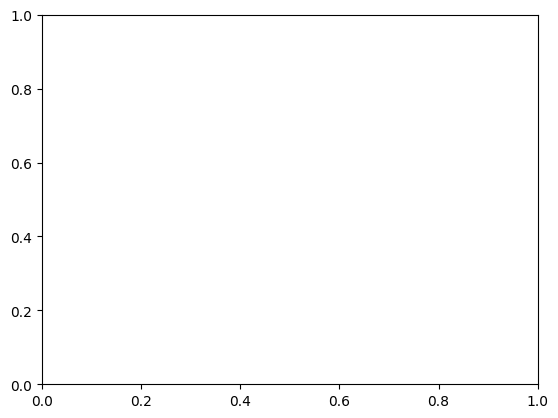

In [12]:
# KMeans

wcss = []
for i in range(1,31):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
    print('Cluster ', i, ' done')
    print('WCSS: ', kmeans.inertia_)



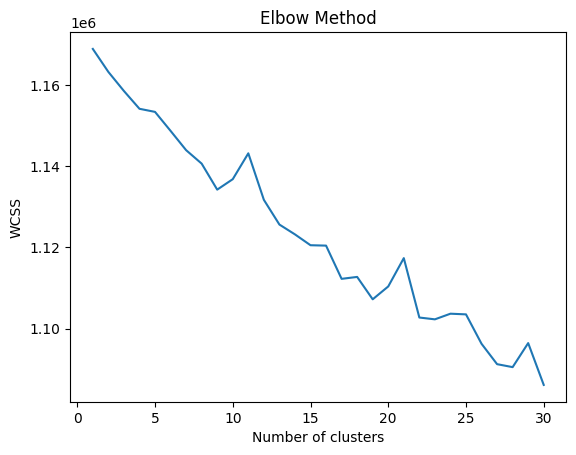

In [13]:
plt.plot(range(1,31),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
print(words[250:300])

['decis' 'declar' 'defenc' 'defend' 'delay' 'deliv' 'demand' 'deni'
 'despit' 'destroy' 'detent' 'develop' 'die' 'director' 'disabl' 'disast'
 'discuss' 'diseas' 'dismiss' 'disput' 'doctor' 'dog' 'dollar' 'domest'
 'donald' 'donat' 'doubl' 'doubt' 'draw' 'dri' 'drink' 'drive' 'driver'
 'drop' 'drought' 'drown' 'drug' 'drum' 'dump' 'dure' 'eagl' 'earli' 'eas'
 'east' 'econom' 'economi' 'edg' 'educ' 'effort' 'elder']


In [20]:
N_clusters = [3, 5, 7, 10, 15]

for n in N_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X3)
    common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
    print("Number of clusters: ", n)
    for num, centroid in enumerate(common_words):
        print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
    print('\n')

Number of clusters:  3
0 : polic, new, say, plan, australia, council, govt, australian, report, charg, nsw, kill, court, warn, death, water, fund, urg, year, face, crash, sydney, chang, wa, open
1 : man, charg, murder, polic, jail, court, die, stab, arrest, face, miss, assault, accus, death, kill, attack, guilti, car, crash, shoot, child, sydney, alleg, sex, search
2 : win, award, cup, titl, open, gold, stage, world, final, tour, elect, australia, lead, seri, claim, aussi, australian, second, grand, big, england, race, record, battl, m


Number of clusters:  5
0 : polic, new, plan, win, australia, council, report, court, kill, nsw, warn, water, death, year, sydney, fund, crash, chang, open, wa, interview, urg, day, attack, face
1 : man, charg, murder, polic, court, face, jail, assault, stab, death, die, drug, arrest, guilti, woman, child, attack, accus, sex, car, crash, kill, miss, alleg, shoot
2 : continu, search, miss, investig, polic, fight, probe, protest, clean, push, flood, despi